## Feature Importance using Random Forest Classifier

In this notebook, I will go over a special use case of Random Forest Classifier that is **Feature Importance**.

### Getting the data

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris['data']
y = iris['target']

### Defining a ***RandomForestClassifier*** and checking feature importance

In [2]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(X, y)

for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(f'{name}: {score.round(2)}')

sepal length (cm): 0.1
sepal width (cm): 0.02
petal length (cm): 0.43
petal width (cm): 0.45


Here we can see that the two most important features are the Petal Length and Petal Width. Random Forests are very handy to get a quick understanding of what features actually matter.

### Another Example with MNIST Data

We know that the MNIST data contains handwritten digits and the numbers are mainly centered. So it makes sense to have more important features at the center. Let's visualize this using *RandomForestClassifer*

In the following code, I will:
- Import the data
- Define a *RandomForestClassifer*
- Fit the data to our classifier
- Visualize the feature importances

In [3]:
# Importing the data
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X = mnist['data']
y = mnist['target'].astype(np.uint8)

In [4]:
# Defining the Classifier
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rnd_clf.fit(X, y)

RandomForestClassifier(n_jobs=-1, random_state=42)

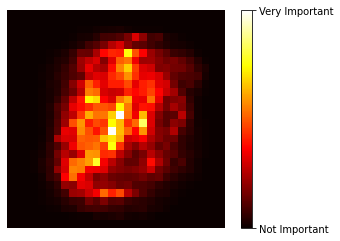

In [5]:
# Plotting the feature importance
import matplotlib as mpl
import matplotlib.pyplot as plt

data = rnd_clf.feature_importances_
image = data.reshape(28, 28)

plt.imshow(image, cmap=mpl.cm.hot, interpolation='nearest')
plt.axis('off')

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not Important', 'Very Important'])

plt.show()

Looking at the above visual, we can confirm that the important features within the MNIST dataset does lie in the center.